##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Axis Insurance
##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Statistical Analyiss


    Brian Hall
    DSBA - Project 2
    04/28/2021
    
<font color=darkblue>
&nbsp;
    
## Problem
Axis Insurance would like to leverage it's customer data to gain insights on it's members and answer a few key questions that will prove useful for making business decisions. 
    
## Objective
Explore the dataset provided by Axis Insurance and extract insights from the data, perform a statistical analysis of key buesiness questions and provide conclusions.

Axis Insurance would like to answer the following questions with statistical significance:

1. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?
2. Prove (or disprove) that the BMI of females is different from that of males.
3. Is the proportion of smokers significantly different across different regions?
4. Is the mean BMI of women with no children, one child, and two children the same?
    
A significance level of 0.05 will be used for all tests.
    
    
    
## Data    
Data has been provided via CSV (AxisInsurance.csv | 54.3k)
#### This data is assumed to be a random sample of a larger population
    
The data is for members of an Axis Insurance Policy(s)
        
1. Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2. Sex - This is the policy holder's gender, either male or female.
3. BMI - This is the body mass index (BMI), which provides a sense of how over or underweight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4. Children - This is an integer indicating the number of children/dependents covered by the insurance plan.
5. Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
6. Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7. Charges​ - Individual medical costs billed to health insurance

The data contains:
    
- 1337 rows & 7 columns (1 duplicate column dropped)
- No missing data
- Column Keys match data description provided
- 2 numerical attributes of type float64
- 2 numerical attributes of type int64
- 3 Categorical attributes of type object
- sex, children, smoker & region will be converted to type category

Member age groups will be generated and added to the DataFrame as "Age Group"  |  Young Adults - 18 to 31, Adults - 32 to 49, Older Adults - 50 to 64
   
    
    
## Hypothesis Test Results
### 1. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?
Let $\mu_1, \mu_2$ be the means of smokers and non-smokers respectively.

Testing the null hypothesis

>$H_0: \mu_1 = \mu_2$

against the alternative hypothesis

>$H_a: \mu_1 > \mu_2$
    
#### Test Method: Paired t-test & 2 Sample Independendt t-test (unkonwn std dev)
#### p-values - 2.42 e-65  &  1.35 e-78
### Conslusion
### There is statistically significant evidence that the claims of members who smoke is greater than those who do not smoke based on provided data
#### ----------------------------------------------------------------------------------------------------    
    
### 2. Prove (or disprove) that the BMI of females is different from that of males.

Let $\mu_1, \mu_2$ be the means of females and males BMI's respectively.

Testing the null hypothesis

>$H_0: \mu_1 = \mu_2$

against the alternative hypothesis

>$H_a: \mu_1  \neq \mu_2$
    
#### Test Method: One-way ANOVA & 2 Sample Independent t-test
#### p-values - 0.072 & 0.072
### Conclusion
### There is statistically significant evidence that the BMI of females and males are NOT different based on the provided data.
#### ----------------------------------------------------------------------------------------------------

### 3. Is the proportion of smokers significantly different across different regions?
Testing the null hypothesis

>$H_0:$ The proportion of smokers is equal across regions

against the alternative hypothesis

>$H_a:$ The proportion of smokers is not equal across regions
    
#### Test Method: Chi Squared Test for Independence
#### p-value - 0.063
### Conclustion
### There is statistically significant evidence that the proportion of smokers is equal across different regions based on provided data.
#### ----------------------------------------------------------------------------------------------------
    
### 4. Is the mean BMI of women with no children, one child, and two children the same?
Let $\mu_1, \mu_2, \mu_3$ be the means of female BMI's with 0, 1, 2 children respectively.

Testing the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: \mu_1 \neq \mu_2 \neq \mu_3$
    
#### Test Method: One-way ANOVA & Kruskal-Wallis
#### p-values: 0.715 & 0.699
### Conclusion
### There is statistically significant evidence that the BMI of females with no children, one child and two children are the same based on the provided data.

### Import libraries and Load data

In [1]:
# Import Libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
#Load Data into DataFrame & Check
df = pd.read_csv('AxisInsurance.csv')
df.head(10)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

### Verify & Clean Data

In [3]:
# -- Check for missing data
def findNulls(df):
    numOfNulls = df.isnull().sum().sort_values(ascending=False)
    percentOfNulls = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missingData = pd.concat([numOfNulls, percentOfNulls], axis=1, keys=['numOfNulls', 'percentOfNulls'])
    return missingData
print(findNulls(df))

# -- Check for duplicate rows
print('')
print('Before Duplicate Check', df.shape)
dfObj = df
duplicateDFRow = dfObj[dfObj.duplicated()]
print('Duplicated Rows: ', len(duplicateDFRow))
print('')
print(duplicateDFRow)
df = df.drop(df.index[duplicateDFRow.index[0]])
print('')
print('After Duplicate Check', df.shape)

          numOfNulls  percentOfNulls
charges            0             0.0
region             0             0.0
smoker             0             0.0
children           0             0.0
bmi                0             0.0
sex                0             0.0
age                0             0.0

Before Duplicate Check (1338, 7)
Duplicated Rows:  1

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

After Duplicate Check (1337, 7)


#### No apparent missing Data
#### No need to clean data due to missing observations
#### 1 duplicate row identified and dropped from the DataFrame

### Examine Data

In [4]:
# -- Examine dataframe and 
# -- Check data types that may need to be converted
print(df.head(2))
print('')
print(df.shape)
print('')
print(df.columns)
print('')
print(df.dtypes)
print('')
print(df.dtypes.value_counts())
print('')
print(type(df))

   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523

(1337, 7)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

object     3
int64      2
float64    2
dtype: int64

<class 'pandas.core.frame.DataFrame'>


### Data contains
####    1337 rows & 7 columns
####   Column Keys match data description provided
####    2 numerical attributes of type float64
####    2 numerical attributes of type int64
####    3 Categorical attributes of type object
####   sex, children, smoker & region will be converted to type category


In [5]:
# Convert sex, children, smoker, region to type category
aidf = df.astype({"sex":'category', "children":'category', "smoker":'category', "region":'category'})
print(aidf.dtypes)
aidf.head(5)

age            int64
sex         category
bmi          float64
children    category
smoker      category
region      category
charges      float64
dtype: object


age     sex     bmi children smoker     region      charges
0   19  female  27.900        0    yes  southwest  16884.92400
1   18    male  33.770        1     no  southeast   1725.55230
2   28    male  33.000        3     no  southeast   4449.46200
3   33    male  22.705        0     no  northwest  21984.47061
4   32    male  28.880        0     no  northwest   3866.85520

### Perform a statistical overview of the data

In [6]:
# -- Get overview of the data
aidf.describe(include="all")

age   sex          bmi  children smoker     region  \
count   1337.000000  1337  1337.000000    1337.0   1337       1337   
unique          NaN     2          NaN       6.0      2          4   
top             NaN  male          NaN       0.0     no  southeast   
freq            NaN   675          NaN     573.0   1063        364   
mean      39.222139   NaN    30.663452       NaN    NaN        NaN   
std       14.044333   NaN     6.100468       NaN    NaN        NaN   
min       18.000000   NaN    15.960000       NaN    NaN        NaN   
25%       27.000000   NaN    26.290000       NaN    NaN        NaN   
50%       39.000000   NaN    30.400000       NaN    NaN        NaN   
75%       51.000000   NaN    34.700000       NaN    NaN        NaN   
max       64.000000   NaN    53.130000       NaN    NaN        NaN   

             charges  
count    1337.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13279.121487  
std     12110.359656  
min      1121.873900  
25%      4746.344000  
50%      9386.161300  
75%     16657.717450  
max     63770.428010

### Observations

Age: mean 39.2, range 18 - 64

BMI: mean 30.66, range 15.96 - 53.13

Charges: mean 13,270.42, range 1,121.87 - 63,770.43

Age & BMI mean and median are close suggesting a normal distribution

Charges mean is more than it's median suggesting a right skew

More males than females

More non-smokers than smokers

More members in the Southeast region

# EDA
# Uni-Variate Analysis

In [7]:
# Function to create histogram and boxplot for numerical attributes
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           )
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') 
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

# Function to create percentages for count plots - categorical attributes
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 12) 
    plt.show() 

### Age

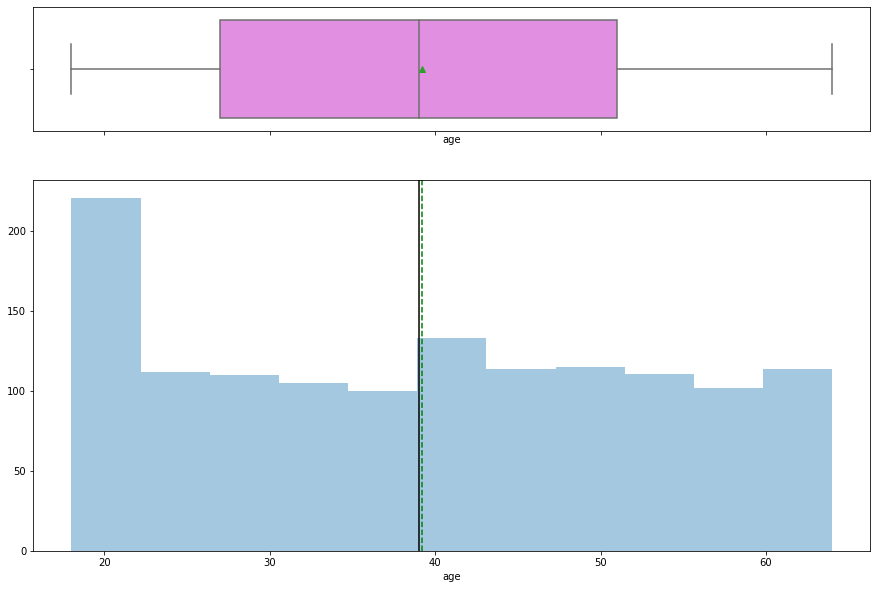

In [8]:
# Age distribution
histogram_boxplot(aidf["age"])

<AxesSubplot:xlabel='age', ylabel='Density'>

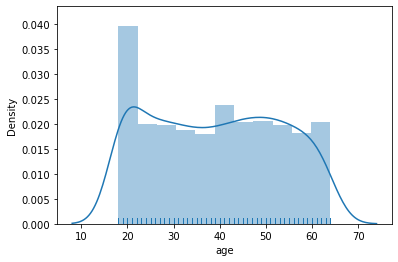

In [9]:
sns.distplot(aidf.age, rug=True)

### Observations

Mean and median are aproximately the same suggesting normal distribution despite a spike around age 20

There seem to be few if any outliers

There are many more members around the age of 20 than any other age group

Aproximately 75% of members are below the age of ~ 52

There are no members over the age of 64, likely due to Medicare / Medicaid

Create age groups to more easily visualize age. Young Adults - 18 to 31, Adults - 32 to 49, Older Adults - 50 to 64

#### Create Age Groups for easier visualization and categorization

Young Adults    496
Adults          485
Older Adults    356
Name: Age Group, dtype: int64

Young Adults    37.097981
Adults          36.275243
Older Adults    26.626776
Name: Age Group, dtype: float64


<AxesSubplot:xlabel='Age Group', ylabel='count'>

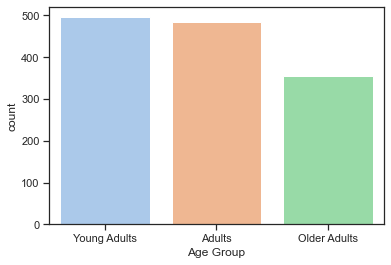

In [10]:
# Create Age Groups 
# Young Adults - 18 to 31, Adults - 32 to 49, Older Adults - 50 to 64
aidf['Age Group'] = pd.cut(x=aidf['age'], bins = [17,32,50,65], labels = ['Young Adults', 'Adults', 'Older Adults'])
agPercent = aidf['Age Group'].value_counts(lambda x: x / float(x.sum()))
print(aidf['Age Group'].value_counts())
print('')
print(agPercent * 100)
sns.set(style="ticks", palette="pastel")
sns.countplot(x='Age Group', data=aidf)


### Observation
496 Young Adults - 37.1%

485 Adults - 36.2%

356 Older Adults - 26.6%

### Sex

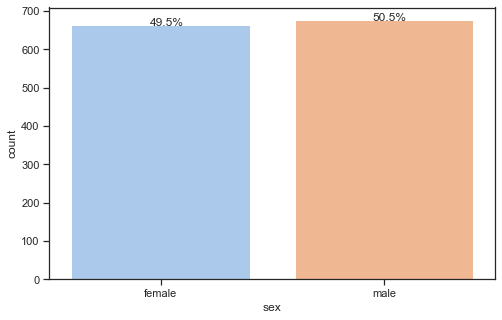

In [11]:
plt.figure(figsize=(8,5))
ax = sns.countplot(aidf["sex"],palette='pastel')
perc_on_bar(ax,aidf["sex"])

### Observation
Males and Females are nearly evenly distributed

Females 49.5% -- Males 50.5%

### BMI

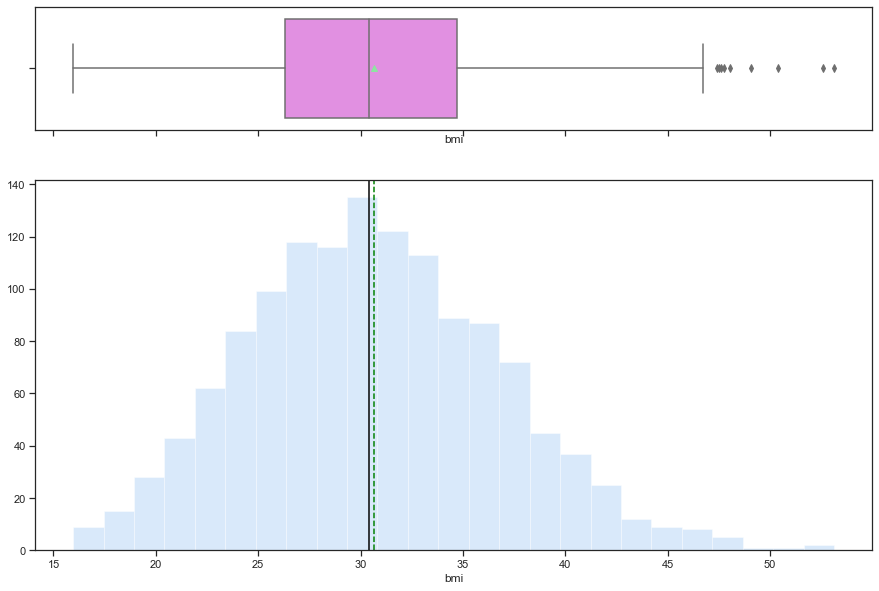

In [12]:
# Visualize BMI distribution
histogram_boxplot(aidf["bmi"])

### Observations
Mean and Median are nearly the same, ~30, suggesting a normal distribution.  However there does seem to be a very slight right skew

Nearly 75% of members are greater than the upper range for normal BMI (18.5 - 24.9)

There are several outliers above a BMI of 46

### Children

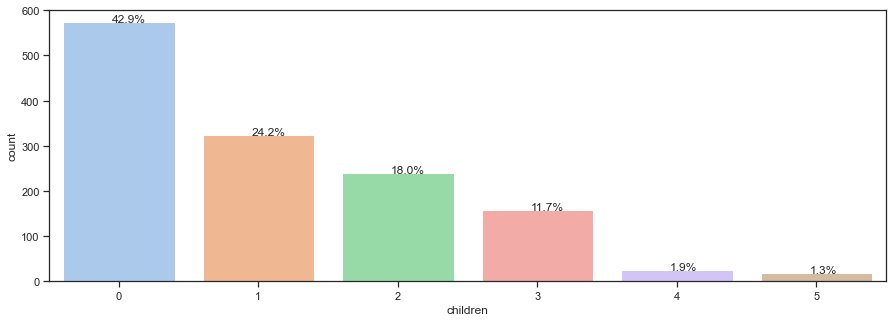

In [13]:
# Visualize Children distribution
plt.figure(figsize=(15,5))
ax = sns.countplot(aidf["children"],palette='pastel')
perc_on_bar(ax,aidf["children"])

### Observations
Nearly half, 43%, of members have 0 children

Members with >3 children account for only 3.2%

### Smoker

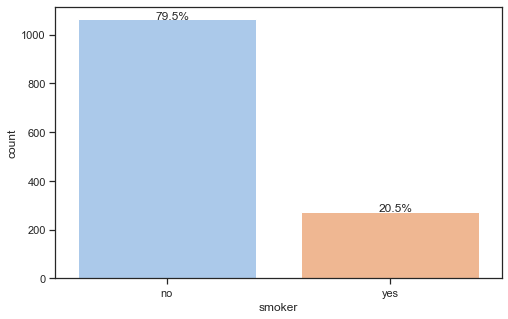

In [14]:
# Visualize Smoker Distribution
plt.figure(figsize=(8,5))
ax = sns.countplot(aidf["smoker"],palette='pastel')
perc_on_bar(ax,aidf["smoker"])

### Observations
Nearly 80% of members do not smoke

### Region

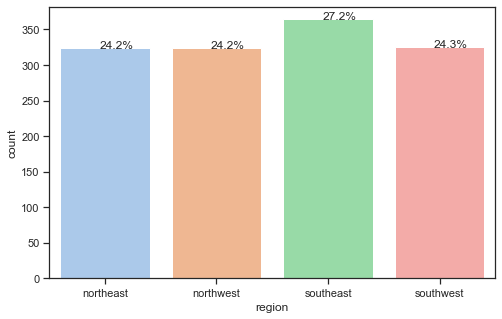

In [15]:
# Visualize Region Distribution
plt.figure(figsize=(8,5))
ax = sns.countplot(aidf["region"],palette='pastel')
perc_on_bar(ax,aidf["region"])

### Observations
Members are distrubited across the regions nearly evenly with slightly more, 3%, in the Southeast

### Charges

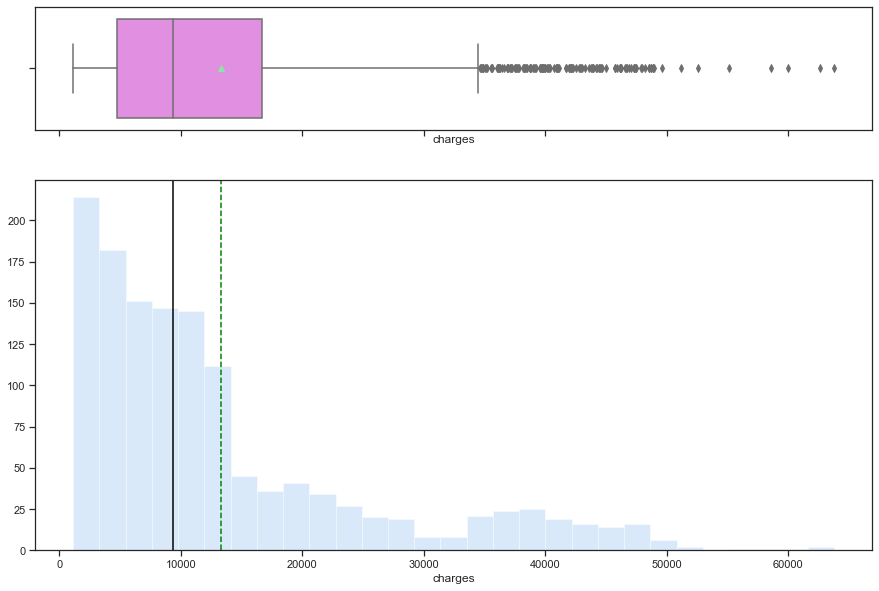

In [16]:
# Visualize Charges distribution
histogram_boxplot(aidf["charges"])

<AxesSubplot:xlabel='charges', ylabel='Density'>

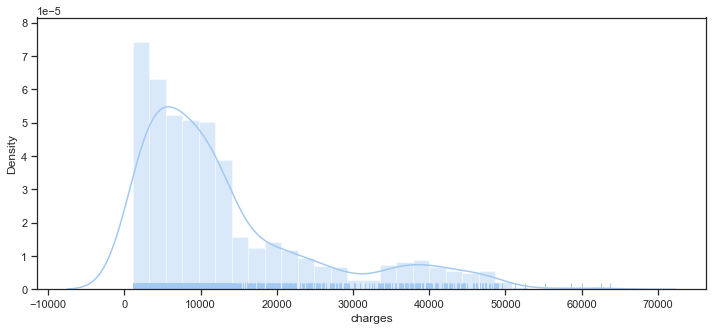

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(aidf.charges, rug=True)

### Observations
Charges appears to be a F Distribution

Charges distribution is highly right skewed

There are many outliers between 34,000 and 50,000

There are several outliers above 50,000 and could likely be considered catestrophic cases

The majority of charges are below 15,000

# Multi-Variate Analysis

In [18]:
aidf.head()

age     sex     bmi children smoker     region      charges     Age Group
0   19  female  27.900        0    yes  southwest  16884.92400  Young Adults
1   18    male  33.770        1     no  southeast   1725.55230  Young Adults
2   28    male  33.000        3     no  southeast   4449.46200  Young Adults
3   33    male  22.705        0     no  northwest  21984.47061        Adults
4   32    male  28.880        0     no  northwest   3866.85520  Young Adults

### Correlation - smoker focus

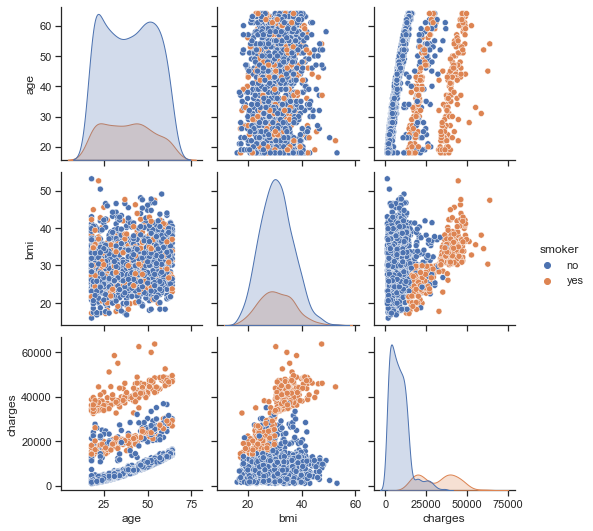

In [19]:
# Pairplot for quick correlation overview - hue Smoker
sns.set_theme(style="ticks")
sns.pairplot(aidf, hue = 'smoker')

### Observations
There Seems to be a high correlation with smokers and charges

Smokers seem to be evenly distributed within bmi and age

Age & BMI seem to be evenly distributed

### Correlation - sex / gender focused

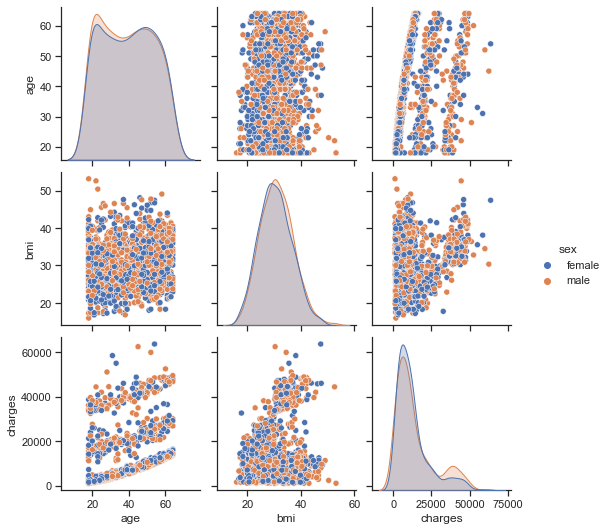

In [20]:
# Pairplot for quick correlation overview - hue Sex
sns.set_theme(style="ticks")
sns.pairplot(aidf, hue = 'sex')

### Observations
Male and female seem to be evenly distributed across attributes

Males have slightly higher charges in the 25k to 52k range

Females have slightly higher charges in the 1k to 20k range

### Correlation - children focus

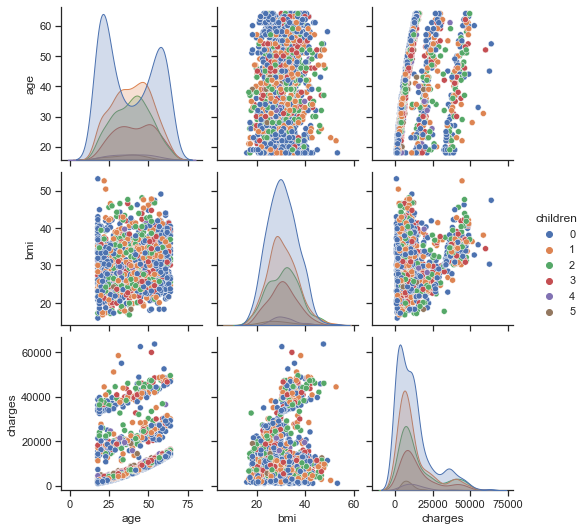

In [21]:
# Pairplot for quick correlation overview - hue Children
sns.set_theme(style="ticks")
sns.pairplot(aidf, hue = 'children')

### Observations
BMI, Charges & Age seems to be evenly distributed regardless of number of children

### Correlation - Age Group focus

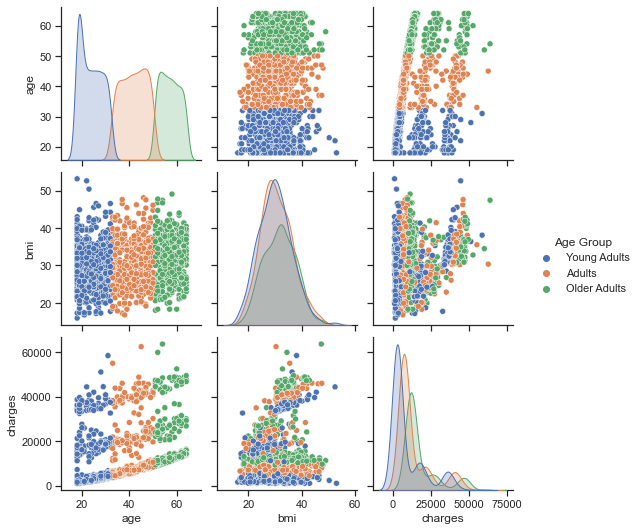

In [22]:
# Pairplot for quick correlation overview - hue Age Group
sns.set_theme(style="ticks")
sns.pairplot(aidf, hue = 'Age Group')

### Observations
BMI seems to be evenly distributed across age groups

There may be some correlation between age and charges

### Correlation - Heatmap

<AxesSubplot:>

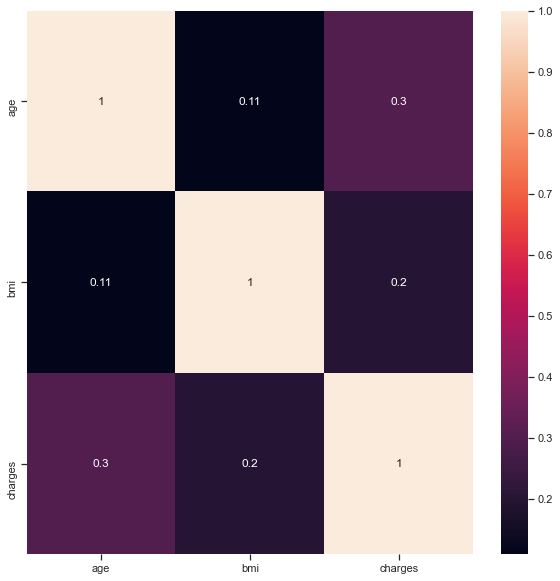

In [23]:
# Heatmap for quick correlation overview
plt.figure(figsize=(10,10))
sns.heatmap(aidf.corr(), annot=True) 

### Observations
There is suprislingly low correlation among age, bmi & charges

Age and Charges have the highest correlation of 0.3

Age and BMI have the lowest correlation of 0.11

### Correlation - Heatmap with children

<AxesSubplot:>

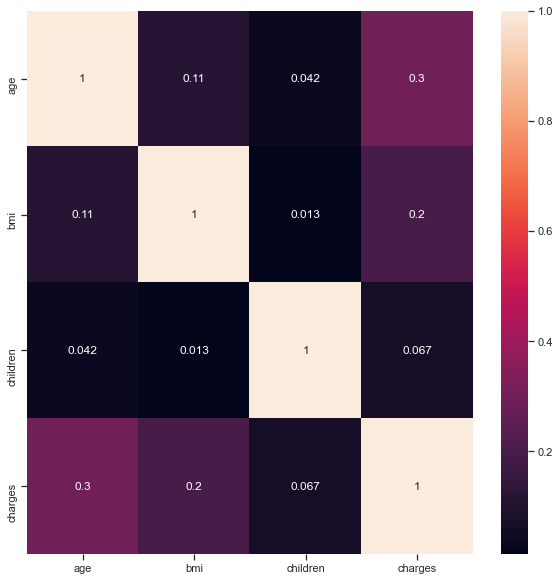

In [24]:
# Heatmap for quick correlation overview - WITHOUT ATTRIBUTES CHANGED TO TYPE CATEGORY 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True) 

### Observations 
There is very low correlation for all attributes and number of children, 0.013 to 0.068

## Explore charges

### Charges and sex / gender

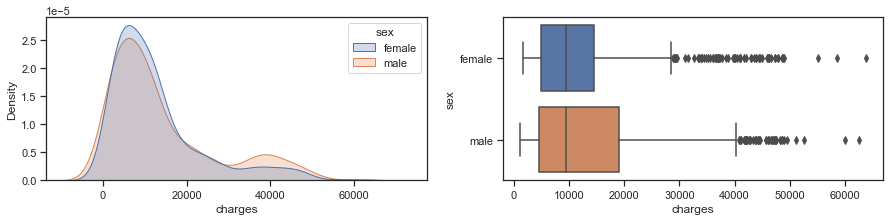

In [25]:
# Charges and sex
fig, ax =plt.subplots(1,2, figsize= (15,3))
sns.kdeplot(x='charges', hue='sex', fill=True, data=aidf, ax=ax[0])
sns.boxplot(x="charges", y="sex", data=aidf, ax=ax[1])
fig.show()

### Observations
Male and female have nearly the same mean of 9.5k and 25% of about 5k however males have higher charges in the 75%

Males and females have many higher outliers in charges with females starting about 30k and males about 40k

Males have a wider distribution across charges

### Charges and Age Group

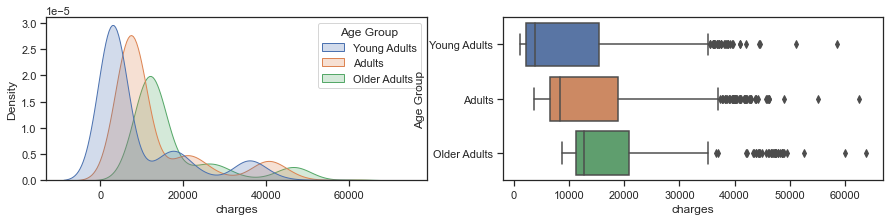

In [26]:
# Charges and Age Group
fig, ax =plt.subplots(1,2, figsize= (15,3))
sns.kdeplot(x='charges', hue='Age Group', fill=True, data=aidf, ax=ax[0])
sns.boxplot(x="charges", y="Age Group", data=aidf, ax=ax[1])
fig.show()

### Observations
As would be expected Older Adults have higher average charges and Young Adults have lower average charges

Suprisingly Older Adults do not have as high a distribution as Young Adults and Adults across charges

Charges primarily overlap across age groups in the 12k to 18k range

All age groups have higher charges outliers

All age ranges have a significantly larger Q3

### Charges, bmi, sex

<AxesSubplot:xlabel='bmi', ylabel='charges'>

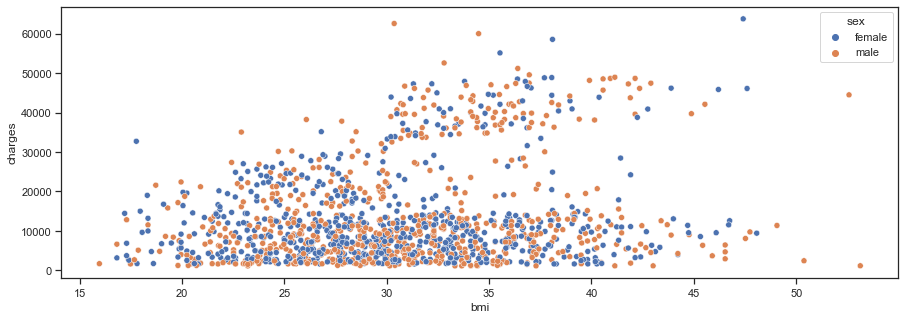

In [27]:
# Charges and bmi with sex hue
plt.figure(figsize=(15,5))
#sns.lineplot(x="bmi", y="charges",ci=0,data=aidf,color="RED")
sns.scatterplot(x='bmi', y='charges', hue='sex', data=aidf)

### Charges, BMI and sex

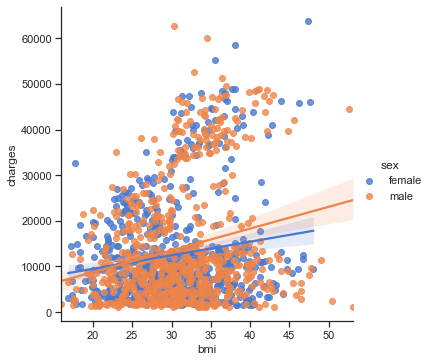

In [28]:
sns.lmplot(x='bmi', y='charges', hue='sex', palette="muted", data=aidf)

### Charges and BMI

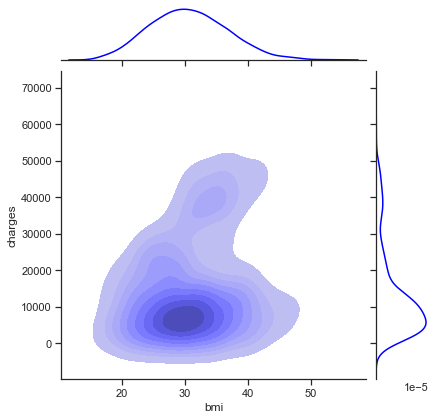

In [29]:
sns.jointplot(x=aidf["bmi"],y=aidf["charges"],kind="kde",color="blue",shade="dark")

### Observations
Note: Normal bmi 18.5 to 25 

Normal bmi has slightly lower density in the lower charges

Normal bmi has nearly no charges above 30k

Charges above 30k are primarily to bmi above 30

Charges between 15k and 30k are for bmi 20 to 30

Highest density is 20 to 40 bmi and 1k to 15k

BMI and charges are mildly correlated 

### Charges and Children

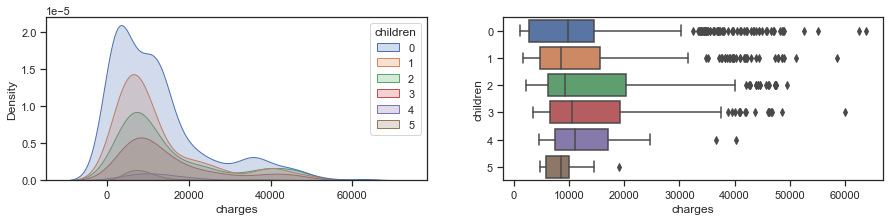

In [30]:
# Charges and children
fig, ax =plt.subplots(1,2, figsize= (15,3))
sns.kdeplot(x='charges', hue='children', fill=True, data=aidf, ax=ax[0])
sns.boxplot(x="charges", y="children", data=aidf, ax=ax[1])
fig.show()

### Observations
Members with 2 children have the widest distribution and highest charges within the IQR despite making up only 17.9% of the population

Median charges for members are close across # of children with 5 children haveing the lowest (5 children is only 1.7% of the population

### Charges and Region

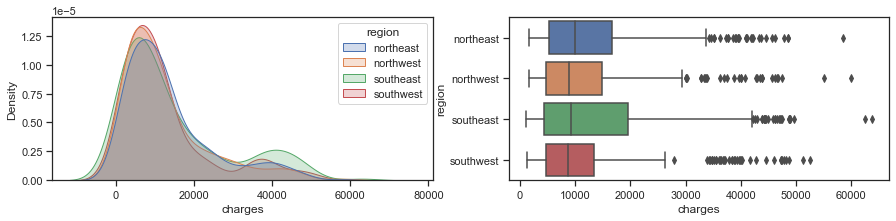

In [31]:
# Charges and Region
fig, ax =plt.subplots(1,2, figsize= (15,3))
sns.kdeplot(x='charges', hue='region', fill=True, data=aidf, ax=ax[0])
sns.boxplot(x="charges", y="region", data=aidf, ax=ax[1])
fig.show()

### Observations
Median for charges is approximately the same, ~ 9k across all regions

Southeast region has the widest distribution and highest charges with only 3% more members than othe regions

Swouthwest region has the most narrow distribution of charges but still has many higher charges outliers

Southeast has higher charges in the 30k to 55k range

### Charges and Smoking

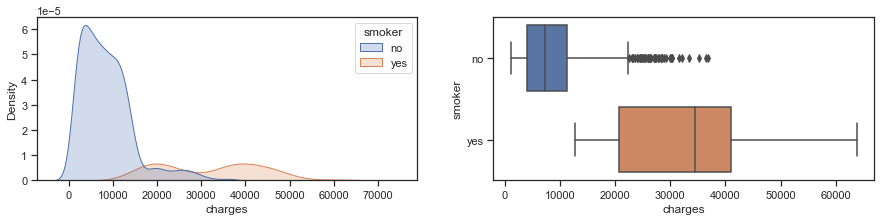

In [32]:
# Charges and Smoking
fig, ax =plt.subplots(1,2, figsize= (15,3))
sns.kdeplot(x='charges', hue='smoker', fill=True, data=aidf, ax=ax[0])
sns.boxplot(x="charges", y="smoker", data=aidf, ax=ax[1])
fig.show()

### Charges and BMI

<Figure size 720x360 with 0 Axes>

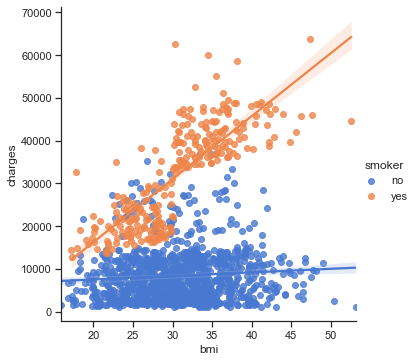

In [33]:
plt.figure(figsize=(10,5))
sns.lmplot(x='bmi', y='charges', hue='smoker', palette="muted", data=aidf)

### Observations
There seems to be a high correlation between smokers, charges

Smokers median is apx 25k higher than non-smokers

The vast majority of charges below 18k are to non-smokers

The vast majority of charges above 18k are to smokers

Smokers account for all charges above 39k

Smoker charges median is higher then nearly all non-smoker outliers

Nearly all of the smokers IQR is higher then the entire non-smokers distribution

Smokers 75th percentile and above are higher than any non-somker outliers

## Explore BMI

### BMI and Smoker

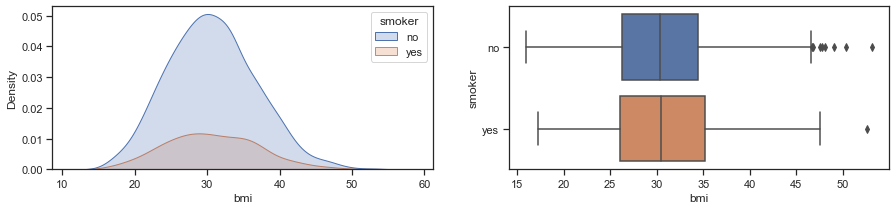

In [34]:
# BMI, Smoking & age
fig, ax =plt.subplots(1,2, figsize= (15,3))
sns.kdeplot(x='bmi', hue='smoker', fill=True, data=aidf, ax=ax[0])
sns.boxplot(x="bmi", y="smoker", data=aidf, ax=ax[1])
fig.show()

### BMI and Smoker

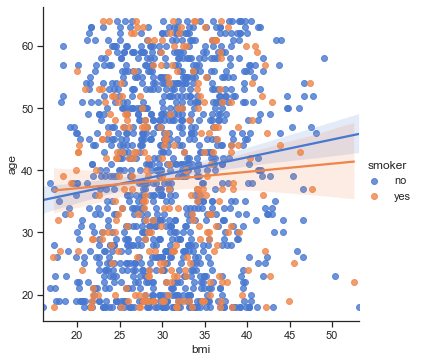

In [35]:
sns.lmplot(x='bmi', y='age', hue='smoker', palette="muted", data=aidf)

### Observations
BMI for smokers and non-smokers are nearly evenly distributed

Non-Smokers have more outliers but account for nearly 50% of the population

There appears to be little to no correlation between bmi, age & smoking

### BMI and Sex / Gender

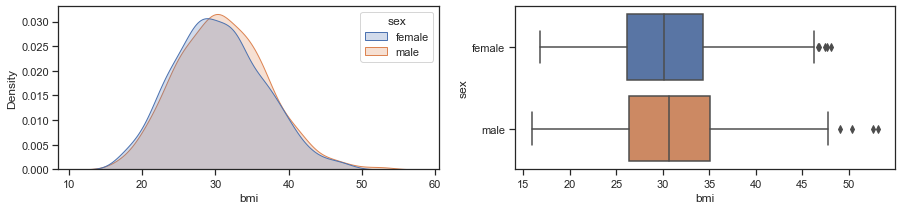

In [36]:
# BMI and sex
fig, ax =plt.subplots(1,2, figsize= (15,3))
sns.kdeplot(x='bmi', hue='sex', fill=True, data=aidf, ax=ax[0])
sns.boxplot(x="bmi", y="sex", data=aidf, ax=ax[1])
fig.show()

### Observations
BMI distribution and gender have nearly identical distributions and means and do not appear to be correlated

Males have a few higher outliers

### BMI and Children

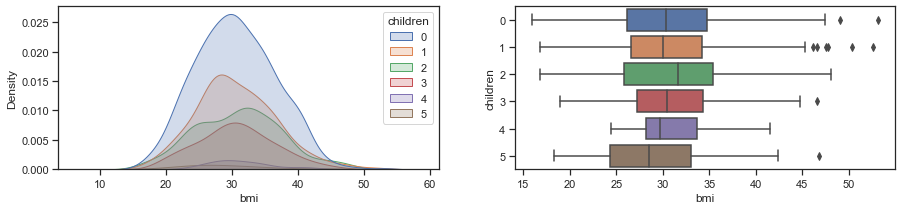

In [37]:
# BMI and children
fig, ax =plt.subplots(1,2, figsize= (15,3))
sns.kdeplot(x='bmi', hue='children', fill=True, data=aidf, ax=ax[0])
sns.boxplot(x="bmi", y="children", data=aidf, ax=ax[1])
fig.show()

### Observations
BMI and children seem to have little correlation

BMI distribution across children is faily even

### BMI and Region

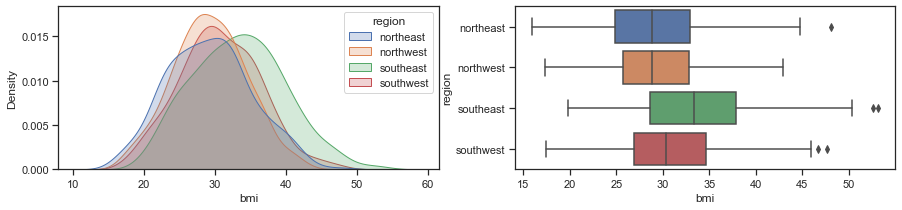

In [38]:
# BMI and Region
fig, ax =plt.subplots(1,2, figsize= (15,3))
sns.kdeplot(x='bmi', hue='region', fill=True, data=aidf, ax=ax[0])
sns.boxplot(x="bmi", y="region", data=aidf, ax=ax[1])
fig.show()

### Observations
The Southeast has a higher mean BMI by 4 - 6 points than other regions

Southeast's BMI distribution is the highest of the regions

No regions IQR is within the normal bmi range

Southeast is the only region with BMIs higher than 48

Southeast has no BMIs lower then 20

## Explore Age

### Age and Children

<AxesSubplot:xlabel='age', ylabel='Density'>

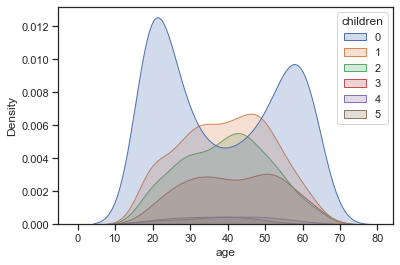

In [39]:
sns.kdeplot(x='age', hue='children', fill=True, data=aidf)

### Observations
For 1 or more children there seems to be a normal distribution across ages

For members with no children the age distribution seems to be bimodal with peaks around 22 and 60

The bimodal age distribution for members with no children is slightly reflected in other bi-variate analyses, though due to the normal peak for other age / children groups it starts to look more like a normal distribution, it could be intteresting to further study why no children is different

Speculation: People may not be having children until they are in their 20's and start losing some children when they are in their 40's

### Age and Region

<AxesSubplot:xlabel='age', ylabel='Density'>

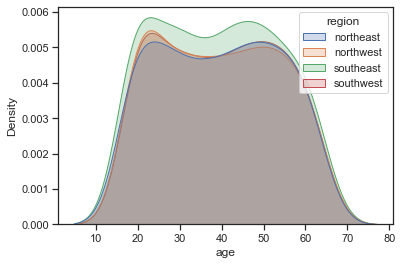

In [40]:
sns.kdeplot(x='age', hue='region', fill=True, data=aidf)

### Observations
Age seems to be fairly evenly distributed across regions with slightly more in the SouthEast region


### Age and Sex


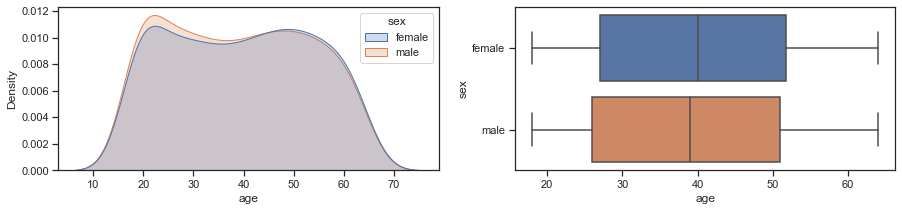

In [41]:
# Age and Sex
fig, ax =plt.subplots(1,2, figsize= (15,3))
sns.kdeplot(x='age', hue='sex', fill=True, data=aidf, ax=ax[0])
sns.boxplot(x="age", y="sex", data=aidf, ax=ax[1])
fig.show()

### Observations
Male and Female are evenly distribut across age

Females have a slightly higher mean and 75th percentile


<AxesSubplot:xlabel='bmi', ylabel='Density'>

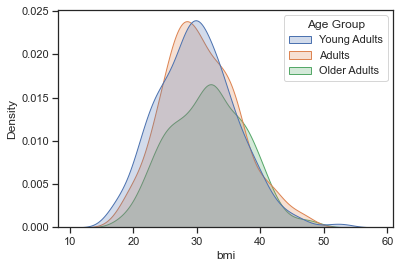

In [42]:
sns.kdeplot(x='bmi', hue='Age Group', fill=True, data=aidf)

### Observations
Older Adults have a higher mean at about 33

Young Adults and Adults have a similar mean about 28

### Age and BMI and Sex

<AxesSubplot:xlabel='bmi', ylabel='age'>

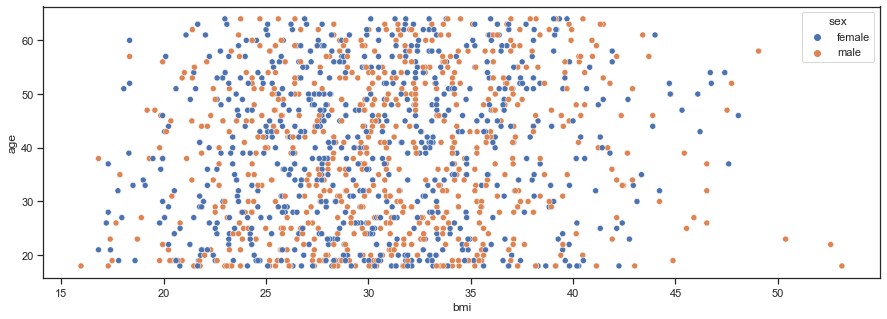

In [43]:
# Age and BMI with sex hue
plt.figure(figsize=(15,5))
sns.scatterplot(x='bmi', y='age', hue='sex', data=aidf)

### Observations
There seems to be no correlation between BMI, age & gender

The highest BMI's > 50 are male young adults

## Explore Smoking

### BMI and Smoking

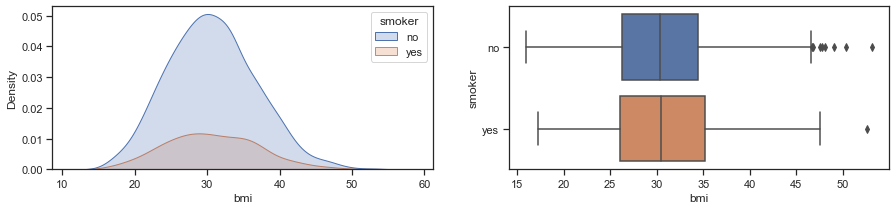

In [44]:
# BMI and Smoking
fig, ax =plt.subplots(1,2, figsize= (15,3))
sns.kdeplot(x='bmi', hue='smoker', fill=True, data=aidf, ax=ax[0])
sns.boxplot(x="bmi", y="smoker", data=aidf, ax=ax[1])
fig.show()

### Observations
BMI distribution and mean are very similar for smokers and non-smokers

### Smoking and Sex

<AxesSubplot:xlabel='sex', ylabel='count'>

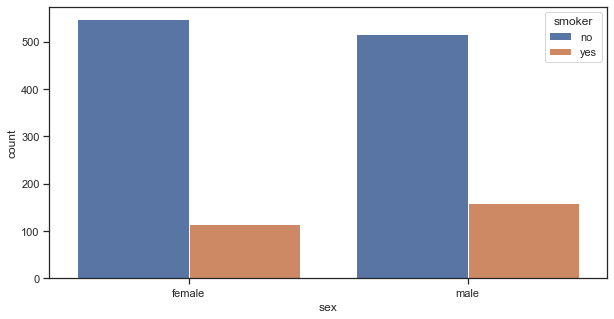

In [45]:
#Smoking and sex
plt.figure(figsize=(10,5))
sns.countplot(x='sex', hue='smoker', data=aidf)

### Observations
There are slightly more male somkers than female smokers

### Smoking and Region

<AxesSubplot:xlabel='region', ylabel='count'>

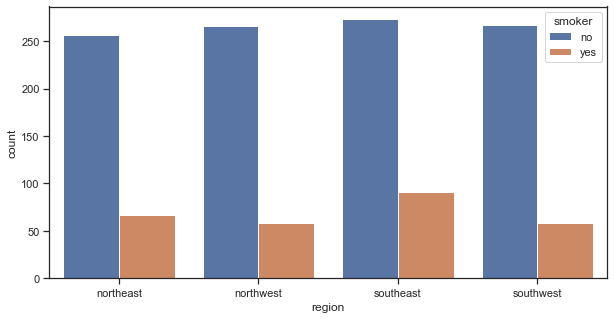

In [46]:
#Smoking and region
plt.figure(figsize=(10,5))
sns.countplot(x='region', hue='smoker', data=aidf)

### Smoking and Children

<AxesSubplot:xlabel='children', ylabel='count'>

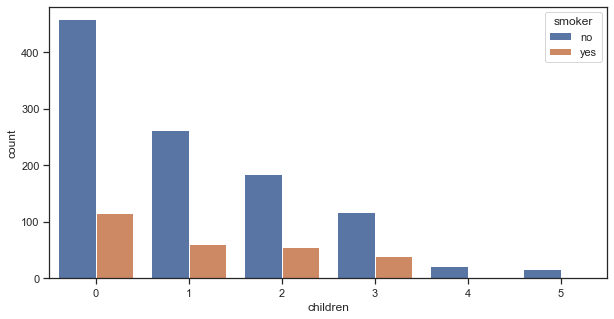

In [47]:
#Smoking and children
plt.figure(figsize=(10,5))
sns.countplot(x='children', hue='smoker', data=aidf)

### Observations
Members with no children have more smokers, they also represent 50% of the population

There are very few smokers among members who have 4 or 5 children

### Smoking and Age Group and Region

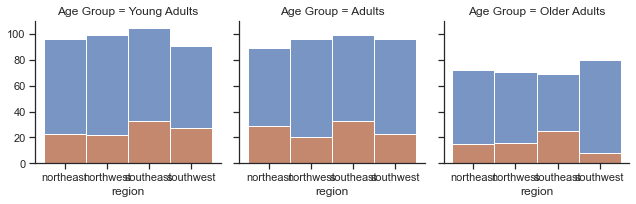

In [48]:
g = sns.FacetGrid(aidf, col="Age Group", hue="smoker")
g.map(sns.histplot, "region", fill=True)

### Smoking and Age Group

<AxesSubplot:xlabel='Age Group', ylabel='count'>

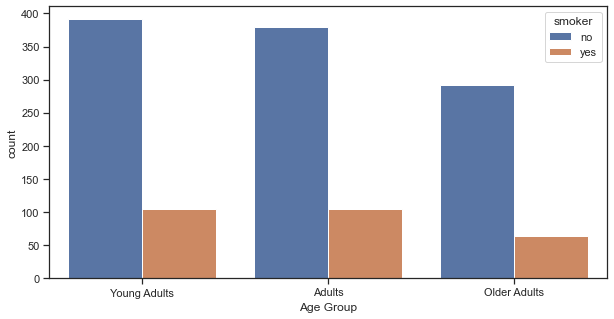

In [49]:
#Smoking and Age Group
plt.figure(figsize=(10,5))
sns.countplot(x='Age Group', hue='smoker', data=aidf)

### Observations
Slightly more Adults smoke than other age groups with Older Adults having the least

### Charges and Smoking

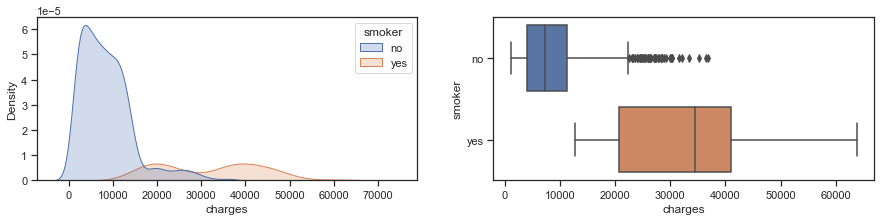

In [50]:
# Charges and Smoking
fig, ax =plt.subplots(1,2, figsize= (15,3))
sns.kdeplot(x='charges', hue='smoker', fill=True, data=aidf, ax=ax[0])
sns.boxplot(x="charges", y="smoker", data=aidf, ax=ax[1])
fig.show()

### Smoking and charges

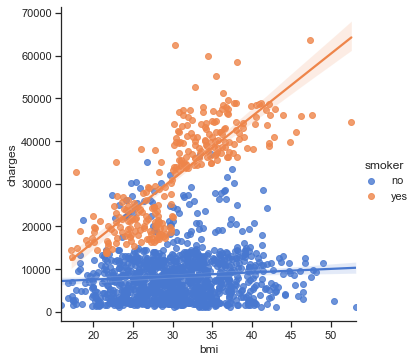

In [51]:
sns.lmplot(x='bmi', y='charges', hue='smoker', palette="muted", data=aidf)

### Smoking and Charges

<AxesSubplot:xlabel='charges', ylabel='smoker'>

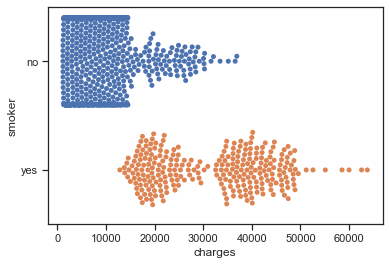

In [52]:
sns.swarmplot(x=aidf.charges, y=aidf.smoker)

### Observations
There seems to be a high correlation between smokers, bmi and charges

Smokers median is apx 25k higher than non-smokers

The vast majority of charges below 18k are to non-smokers

The vast majority of charges above 18k are to smokers

Smokers account for all charges above 39k

Smoker charges median is higher then nearly all smoker outliers

Nearly all of the smokers IQR is higher then the entire non-smokers distribution

Smokers 75th percentile and above are higher than any non-somker outliers

### Pandas Profiling

In [53]:
from pandas_profiling import ProfileReport
prof = ProfileReport(aidf)
prof

### =======================================================================================

# Key Business Questions

## 1. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't.

- Examine data:
-- Create target sample data
-- Create null and alternate hypothesis
-- Establish charges sample means for smokers and non-smokers
-- Check distribution of samples
-- Check assumptions
-- Find the p-value and evaluate against an alpha of 0.05

In [54]:
# Separate smokers and non-smokers into target samples
smokers = aidf[(aidf['smoker'] == 'yes')]
nonSmokers = aidf[(aidf['smoker'] == 'no')]
print('Number of smokers = ',smokers.shape[0])
print('Number of non-smokers = ',nonSmokers.shape[0])

Number of smokers =  274
Number of non-smokers =  1063


### Mean and Standard Deviation of initial population is NOT known

### Null and alternative hypothesis

Let $\mu_1, \mu_2$ be the means of smokers and non-smokers respectively.

Testing the null hypothesis

>$H_0: \mu_1 = \mu_2$

against the alternative hypothesis

>$H_a: \mu_1 > \mu_2$

### Determine mean and standard deviation of charges

In [55]:
# Determine the mean and standard deviation of charges for mu1 and mu2
mu1 = smokers['charges'].mean()
mu2 = nonSmokers['charges'].mean()
sigma1 = smokers['charges'].std()
sigma2 = nonSmokers['charges'].std()
print('Charges mean for smokers =', round(mu1))
print('Charges mean for non-smokers =', round(mu2))
print('Charges Standard Deviation for smokers =', round(sigma1))
print('Charges Standard Deviation for non-smokers =', round(sigma2))

Charges mean for smokers = 32050
Charges mean for non-smokers = 8441
Charges Standard Deviation for smokers = 11542
Charges Standard Deviation for non-smokers = 5993


### Standard Deviations are NOT equal

### Visualize the mean and distribution

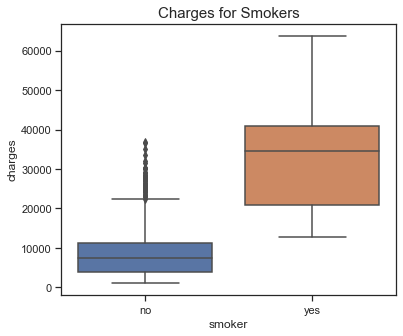

In [56]:
# Visualize the mean and distribution
fig, ax = plt.subplots(figsize = (6,5))
a = sns.boxplot(x= aidf['smoker'], y = aidf['charges'], data = aidf)
a.set_title("Charges for Smokers", fontsize=15)
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Density'>

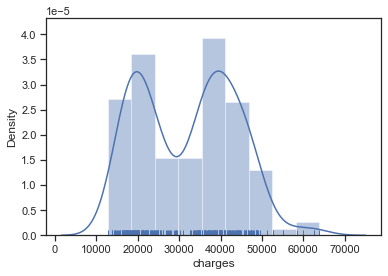

In [57]:
sns.distplot(smokers.charges, rug=True)

### Distribution does not appear to be normal but given the sample size is well above 30 we will assume it is close enough to normal for a Paired t t-Test or 2 sample independent t-test

#### Check Assumptions for a Paired t-test & 2 sample independent t-test
* Continuous data - yes charges are continuous
* Normally distributed populations - Sample size is well above 30, so assumed to be normal
* Independent observations - As we are taking random samples from similar / same populations observations can be considered independent
* Unequal population standard deviations - As the sample standard deviations are very different so assume same for population
* Random sampling from the population - Yes, it is assumed that this is a random sample of the population.

#### Create even samples to find the p-value from 

In [58]:
smoker_sample = smokers['charges'].sample(n=200, random_state=1)
nonSmoker_sample = nonSmokers['charges'].sample(n=200, random_state=1)
print(smoker_sample.shape)
print(smoker_sample.head(5))
print(nonSmoker_sample.shape)
print(nonSmoker_sample.head(5))

(200,)
259    33750.29180
476    35147.52848
951    47462.89400
587    43943.87610
52     23568.27200
Name: charges, dtype: float64
(200,)
1004     8627.5411
1089    10577.0870
193     12044.3420
840      1526.3120
201      8871.1517
Name: charges, dtype: float64


### Find the p-value using a Paired t-test

In [59]:
from scipy.stats import ttest_rel

# find the p-value
test_stat, p_value = ttest_rel(smoker_sample, nonSmoker_sample, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  2.4241709231953944e-65


### Find the p-value using a 2 sample independent t-test with unequal std dev

In [60]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(smoker_sample, nonSmoker_sample, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  1.354563554460858e-78


### The p-value for the equality of charges means of smokers and non-smokers is significantly below an alpha of 0.05.  We must fail to accept the Null Hypothesis   $H_0: \mu_1 = \mu_2$ 

## Conslusion
## There is statistically significant evidence that the claims of members who smoke is greater than those who do not smoke based on provided data

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------
## 2. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

- Examine data:
-- Create target sample data
-- Create null and alternate hypothesis
-- Establish BMI means and stdandard deviation for females and males
-- Check distribution of samples
-- Check assumptions
-- Find the p-value and evaluate against an alpha of 0.05

In [61]:
# Separate females and males into separate dataframes
females = aidf[(aidf['sex'] == 'female')]
males = aidf[(aidf['sex'] == 'male')]
print('Number of females = ', females.shape[0])
print('Number of males = ',males.shape[0])

Number of females =  662
Number of males =  675


### Mean and Standard Deviation of initial population is NOT known

### Null and alternative hypothesis

Let $\mu_1, \mu_2$ be the means of females and males BMI's respectively.

Testing the null hypothesis

>$H_0: \mu_1 = \mu_2$

against the alternative hypothesis

>$H_a: \mu_1  \neq \mu_2$

### Determine mean and standard deviation of BMI

In [62]:
# Determine the mean and standard deviation of female and male BMI
mu1 = females['bmi'].mean()
mu2 = males['bmi'].mean()
sigma1 = females['bmi'].std()
sigma2 = males['bmi'].std()
print('BMI mean for females =', round(mu1))
print('BMI mean for males =', round(mu2))
print('BMI Standard Deviation for females =', round(sigma1))
print('BMI Standard Deviation for males =', round(sigma2))

BMI mean for females = 30
BMI mean for males = 31
BMI Standard Deviation for females = 6
BMI Standard Deviation for males = 6


### Standard Deviation IS equal

### Visualize the mean and distribution

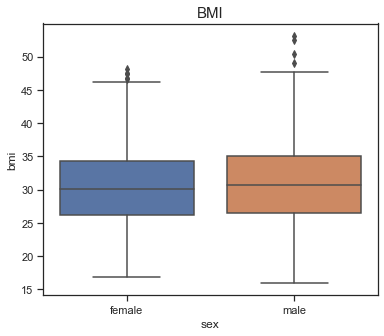

In [63]:
# Visualize the mean and distribution
fig, ax = plt.subplots(figsize = (6,5))
a = sns.boxplot(x= aidf['sex'], y = aidf['bmi'], data = aidf)
a.set_title("BMI", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Males')

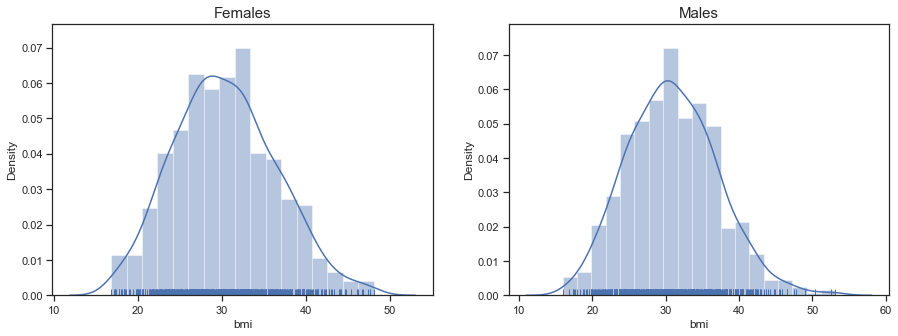

In [64]:
fig, ax =plt.subplots(1,2, figsize= (15,5))
sns.distplot(females.bmi, rug=True, ax=ax[0])
sns.distplot(males.bmi, rug=True, ax=ax[1])
ax[0].set_title("Females", fontsize=15)
ax[1].set_title("Males", fontsize=15)

### Distirbutions seem to be normal

### Check assumptions for a One-way ANOVA F-test
* The populations are normally distributed - Yes, visually the distributions are normal and the sample size is > 30
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, variances of the sample data is equal so we can assume population variances are equal

### Create equal sized sample data

In [65]:
female_sample = females['bmi'].sample(n=500, random_state=1)
male_sample = males['bmi'].sample(n=500, random_state=1)
print(female_sample.shape)
print(female_sample.head(5))
print(male_sample.shape)
print(male_sample.head(5))

(500,)
611     34.800
1334    31.920
91      24.795
214     30.900
498     23.980
Name: bmi, dtype: float64
(500,)
190    31.570
296    27.700
317    32.775
922    31.000
903    36.850
Name: bmi, dtype: float64


### Find the p-value using a One-way ANOVA F-test

In [66]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(female_sample, male_sample)
print('The p-value is ' + str(p_value))

The p-value is 0.07256871490134471


### Find the p-=value using a 2 sample, two-tailed independent t-test with unequal std dev

In [67]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(female_sample, male_sample, equal_var = False, alternative = 'two-sided')
print('The p-value is ', p_value)

The p-value is  0.07256910103027457


### The p-value for the means of female and male BMI's are greater then the alpha of 0.05.  We accept the Null Hypothesis   $H_0: \mu_1 = \mu_2$ 

## Conslusion

## There is statistically significant evidence that the BMI of females and males are NOT different based on the provided data.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------
## 3. Is the proportion of smokers significantly different across different regions?

- Examine data:
-- Create target sample data
-- Create null and alternate hypothesis
-- Check distribution of samples
-- Check assumptions
-- Find the p-value and evaluate against an alpha of 0.05

### Create target sample data

In [68]:
# Create a copy of the data with smoker and region
aidf_smregion = aidf[['smoker', 'region']].copy()
print(aidf_smregion.shape)
print(aidf_smregion.head())

swRegion = aidf[(aidf['region'] == 'southwest')]
seRegion = aidf[(aidf['region'] == 'southeast')]
nwRegion = aidf[(aidf['region'] == 'northwest')]
neRegion = aidf[(aidf['region'] == 'northeast')]

(1337, 2)
  smoker     region
0    yes  southwest
1     no  southeast
2     no  southeast
3     no  northwest
4     no  northwest


### Null and alternative hypothesis

Testing the null hypothesis

>$H_0:$ The proportion of smokers is equal across regions

against the alternative hypothesis

>$H_a:$ The proportion of smokers is not equal across regions

### Visualize distribution

<AxesSubplot:xlabel='region', ylabel='count'>

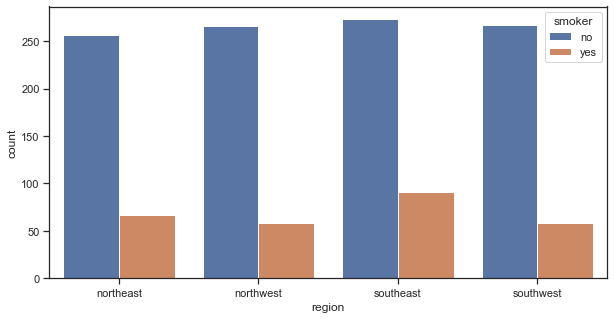

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(x='region', hue='smoker', data=aidf)

### Check assumptions for a Chi-SquaredTest for Independence

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes
* Random sampling from the population - Yes

### Create contingency table for smoker and regions

In [70]:
aidfCT = pd.crosstab(aidf_smregion['smoker'], aidf_smregion['region']).transpose().copy()
aidfCT

smoker      no  yes
region             
northeast  257   67
northwest  266   58
southeast  273   91
southwest  267   58

### Find p-value using the Chi Squared Test for Independence

In [71]:
from scipy.stats import chi2_contingency
# find the p-value
chi, p_value, dof, expected = chi2_contingency(aidfCT)
print('The p-value is', p_value)
p_value

The p-value is 0.06354826573182334


0.06354826573182334

### The p-value is greater than the alpha of 0.05.  We fail to accept the Null Hypothesis   $H_0:$ The proportion of smokers is equal across regions

## Conslusion

## There is statistically significant evidence that the proportion of smokers is not different across different regions based on provided data.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------
## 4. Is the mean BMI of women with no children, one child, and two children the same?

- Examine data:
-- Create target sample data
-- Create null and alternate hypothesis
-- Check mean and distribution of samples
-- Check assumptions
-- Find the p-value and evaluate against an alpha of 0.05

### Create target sample data

In [72]:
# Create sample data for Females + BMI with 0,1,2 children
female = aidf[(aidf['sex'] == 'female')]
index_names = female[(female['children'] == 3) | (female['children'] == 4) | (female['children'] == 5)].index
print('Creating female only DF and dropping',  index_names.shape[0], 'rows where children = 3,4,5')
fbcdf = female.drop(index_names).copy()
fbcdf.reset_index(drop=True, inplace=True)
fbcdf.head(10)

Creating female only DF and dropping 96 rows where children = 3,4,5


age     sex     bmi children smoker     region      charges     Age Group
0   19  female  27.900        0    yes  southwest  16884.92400  Young Adults
1   31  female  25.740        0     no  southeast   3756.62160  Young Adults
2   46  female  33.440        1     no  southeast   8240.58960        Adults
3   60  female  25.840        0     no  northwest  28923.13692  Older Adults
4   62  female  26.290        0    yes  southeast  27808.72510  Older Adults
5   56  female  39.820        0     no  southeast  11090.71780  Older Adults
6   52  female  30.780        1     no  northeast  10797.33620  Older Adults
7   60  female  36.005        0     no  northeast  13228.84695  Older Adults
8   30  female  32.400        1     no  southwest   4149.73600  Young Adults
9   34  female  31.920        1    yes  northeast  37701.87680        Adults

### Null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of female BMI's with 0, 1, 2 children respectively.

Testing the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: \mu_1 \neq \mu_2 \neq \mu_3$

### Determine means and standard deviation of mu1, mu2, mu3

In [73]:
# Determine the mean and standard deviation of mu1, mu2, mu3
mu1 = fbcdf[(fbcdf['children'] == 0)].bmi.mean()
mu2 = fbcdf[(fbcdf['children'] == 1)].bmi.mean()
mu3 = fbcdf[(fbcdf['children'] == 2)].bmi.mean()

sigma1 = fbcdf[(fbcdf['children'] == 0)].bmi.std()
sigma2 = fbcdf[(fbcdf['children'] == 1)].bmi.std()
sigma3 = fbcdf[(fbcdf['children'] == 2)].bmi.std()

print('BMI mean for females with 0 children =', mu1)
print('BMI mean for females with 1 children =', mu2)
print('BMI mean for females with 2 children =', mu3)
print('')
print('Standard deviation for females with 0 children =', sigma1)
print('Standard deviation for females with 1 children =', sigma2)
print('Standard deviation for females with 2 children =', sigma3)

BMI mean for females with 0 children = 30.361522491349486
BMI mean for females with 1 children = 30.05265822784811
BMI mean for females with 2 children = 30.64978991596637

Standard deviation for females with 0 children = 5.966934229366254
Standard deviation for females with 1 children = 5.786831048981313
Standard deviation for females with 2 children = 6.628199943377461


#### Means for mu1, mu2, mu3 are very close
#### Standard Deviations for mu1, m2, mu3 are not equal - check variances with Levene test

### Visualize the mean and distribution

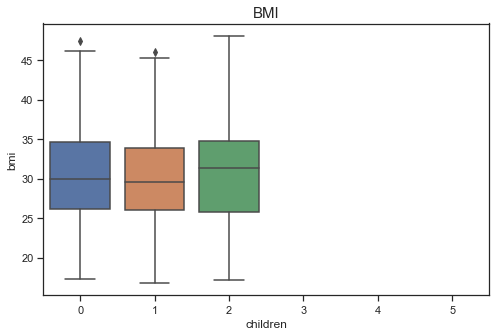

In [74]:
# Visualize the mean and distribution
fig, ax = plt.subplots(figsize = (8,5))
a = sns.boxplot(x= fbcdf['children'], y = fbcdf['bmi'], data = fbcdf)
a.set_title("BMI", fontsize=15)
plt.show()

# ----- Unable to determine where 3,4,5 in the below boxplot are coming from ----

Text(0.5, 1.0, 'Children = 2')

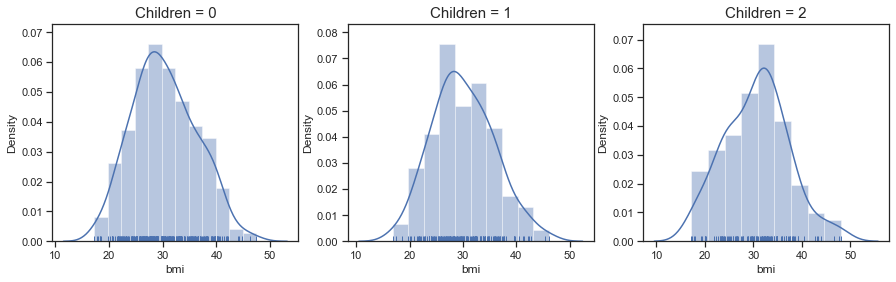

In [75]:
fig, ax =plt.subplots(1,3, figsize= (15,4))
sns.distplot(fbcdf[(fbcdf['children'] == 0)].bmi, rug=True, ax=ax[0])
sns.distplot(fbcdf[(fbcdf['children'] == 1)].bmi, rug=True, ax=ax[1])
sns.distplot(fbcdf[(fbcdf['children'] == 2)].bmi, rug=True, ax=ax[2])
ax[0].set_title("Children = 0", fontsize=15)
ax[1].set_title("Children = 1", fontsize=15)
ax[2].set_title("Children = 2", fontsize=15)

### Test for homogeneity of Varience

In [76]:
#Test for Homogeneity of Variance
from scipy.stats import levene
statistic, p_value = levene(fbcdf[(fbcdf['children'] == 0)].bmi, fbcdf[(fbcdf['children'] == 1)].bmi, fbcdf[(fbcdf['children'] == 2)].bmi)
# find the p-value
print('The p-value is', p_value)

The p-value is 0.3899432394522804


#### Distributions seem normal and the p-value from Levene tes is greater than the alpha of 0.05.  Distributions and variances are close enough for an ANOVA F-test

### Check assumptions for a One-way ANOVA F-test
* The populations are normally distributed - Yes, visually the distributions are normal and the sample size is > 30
* Samples are independent simple random samples - Yes
* Population variances are equal - Yes, Levene test results are higher than alpha of 0.05

### Find the p-value using a One-way ANOVA F-test

In [77]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(fbcdf[(fbcdf['children'] == 0)].bmi, fbcdf[(fbcdf['children'] == 1)].bmi, fbcdf[(fbcdf['children'] == 2)].bmi)
print('The p-value is ' + str(p_value))

The p-value is 0.7158579926754841


### .  Re-test with the non-parametric Kruskal-Wallis Test

In [78]:
#perform Kruskal-Wallis Test 
stats.kruskal(fbcdf[(fbcdf['children'] == 0)].bmi, fbcdf[(fbcdf['children'] == 1)].bmi, fbcdf[(fbcdf['children'] == 2)].bmi)

KruskalResult(statistic=0.713793799408396, pvalue=0.699844648205425)

#### The p-value for the Kruskal-Wallis test agrees with the One-way ANOVA test so we will accept the results.

### The p-value for the BMI means for female's with 0,1 & 2 children are greater then the alpha of 0.05.  We  accept the Null Hypothesis  $H_0: \mu_1 = \mu_2 = \mu_3$

## Conslusion

## There is statistically significant evidence that the BMI of females with no children, one child and two children are the same based on the provided data.